In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드 및 전처리
df = pd.read_csv("C:/Users/Playdata/Desktop/project/2nd_pr/SKN13-2nd-2Team/data/mingyu/KBO_only/kbo_hitters_retired_total.csv", encoding='utf-8')

# pic_url 제거
df = df.drop(columns=['pic_url'])

# 은퇴 나이 컬럼 생성
df['retire_age'] = df['last_year'] - df['birth']

# 2. 피처/타겟 분리
X = df.drop(columns=['name', 'birth', 'last_year', 'retire_age'])
y = df['retire_age']

# 3. train/val/test 분할 (60:20:20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# 4. 결측치 처리
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X.columns)

# 5. 정규화
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# 6. 모델 정의
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# 7. 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)

    # Validation 평가
    val_pred = model.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, val_pred))
    print(f"\n✅ {name} - Validation 성능:")
    print(f"MAE: {mean_absolute_error(y_val, val_pred):.2f}")
    print(f"RMSE: {rmse_val:.2f}")
    print(f"R² Score: {r2_score(y_val, val_pred):.2f}")

    # Test 평가
    test_pred = model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
    print(f"\n🎯 {name} - Test 성능:")
    print(f"MAE: {mean_absolute_error(y_test, test_pred):.2f}")
    print(f"RMSE: {rmse_test:.2f}")
    print(f"R² Score: {r2_score(y_test, test_pred):.2f}")

    # 예측된 retire_year도 출력
    birth_test = df.loc[y_test.index, 'birth']
    real_retire = df.loc[y_test.index, 'last_year']
    predicted_retire = birth_test + np.round(test_pred)

    result_df = pd.DataFrame({
        'name': df.loc[y_test.index, 'name'],
        'birth': birth_test,
        '실제_retire_year': real_retire,
        '예측_retire_year': predicted_retire.astype(int)
    })
    print(f"\n📌 {name} - 예측 결과 (일부):")
    print(result_df.head(5))


✅ LinearRegression - Validation 성능:
MAE: 2.37
RMSE: 3.07
R² Score: 0.59

🎯 LinearRegression - Test 성능:
MAE: 2.18
RMSE: 2.86
R² Score: 0.59

📌 LinearRegression - 예측 결과 (일부):
     name  birth  실제_retire_year  예측_retire_year
788   이창진   1991            2024            2024
904   정현석   1984            2017            2015
289   김현준   2002            2024            2031
1040   터커   1990            2021            2021
332   라모스   1992            2024            2022

✅ RandomForest - Validation 성능:
MAE: 2.11
RMSE: 2.75
R² Score: 0.67

🎯 RandomForest - Test 성능:
MAE: 1.97
RMSE: 2.72
R² Score: 0.63

📌 RandomForest - 예측 결과 (일부):
     name  birth  실제_retire_year  예측_retire_year
788   이창진   1991            2024            2024
904   정현석   1984            2017            2016
289   김현준   2002            2024            2032
1040   터커   1990            2021            2021
332   라모스   1992            2024            2021


C:\Users\Playdata\AppData\Local\Temp\ipykernel_13936\3091742704.py:16: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_13936\3091742704.py:16: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_13936\3091742704.py:16: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_13936\3091742704.py:16: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_13936\3091742704.py:16: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_13936\3091742704.py:16: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE

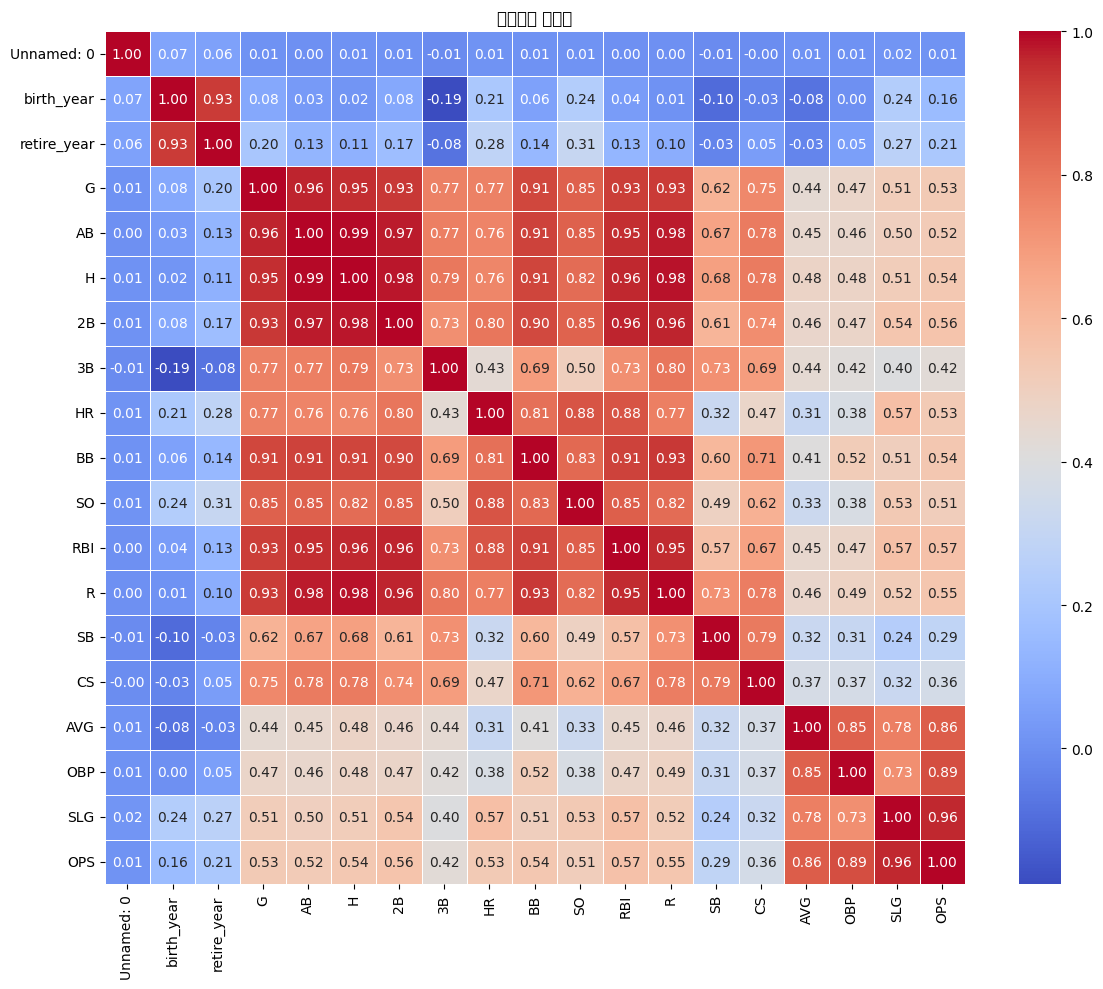

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv("C:/Users/Playdata/Desktop/project/2nd_pr/SKN13-2nd-2Team/data/mlb최종.csv", encoding='cp949')


# 숫자형 컬럼만 선택해서 상관계수 계산
corr = df.select_dtypes(include='number').corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("상관계수 히트맵")
plt.tight_layout()
plt.show()